# Credit Card Fraud Detection


## Anonymized credit card transactions labeled as fraudulent or genuine

### Wisarut Duangmorakot - wisarut.bank@gmail.com

## Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('./creditcard.csv')

### You can find the data here https://www.kaggle.com/mlg-ulb/creditcardfraud

## Check data

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## check for missing data

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## drop unused data

In [6]:
df.drop(columns=['Time'], inplace=True)

## Check for classes magnitude

In [7]:
df.groupby('Class').count()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


In [8]:
print "Class 0", df.groupby('Class').count().iloc[0][0] / float(len(df))
print "Class 1", df.groupby('Class').count().iloc[1][0] / float(len(df))

Class 0 0.9982725143693799
Class 1 0.001727485630620034


As you can see, the number of class 0 (0.998%) is extremely more than class 1 (0.002%). My model maybe overfitted with the class 0.
So, I will use oversampling method to make model better.

## EDA

In [9]:
heatmap = df.corr()
heatmap.style.background_gradient()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1,4.69735e-17,-1.42439e-15,1.75532e-17,6.39116e-17,2.39807e-16,1.99155e-15,-9.49068e-17,2.16958e-16,7.43382e-17,2.43858e-16,2.42209e-16,-2.11546e-16,9.35258e-16,-3.25245e-16,6.30879e-16,-5.01152e-16,2.87013e-16,1.81813e-16,1.03696e-16,-1.75507e-16,7.47737e-17,9.80871e-16,7.35427e-17,-9.80536e-16,-8.6219e-17,3.20823e-17,9.82089e-16,-0.227709,-0.101347
V2,4.69735e-17,1,2.51218e-16,-1.12639e-16,-2.03987e-16,5.02468e-16,3.96649e-16,-4.41398e-17,-5.72872e-17,-4.78239e-16,9.469e-16,-6.58825e-16,3.85452e-16,-2.54104e-16,2.83106e-16,4.9341e-17,-9.88301e-16,2.63665e-16,9.52828e-17,-9.30995e-16,8.44441e-17,2.50083e-16,1.05956e-16,-8.14235e-18,-4.26189e-17,2.60162e-16,-4.47847e-16,-3.67641e-16,-0.531409,0.0912887
V3,-1.42439e-15,2.51218e-16,1,-3.41691e-16,-1.43651e-15,1.43158e-15,2.16857e-15,3.43311e-16,-4.23377e-16,6.28927e-16,-5.50176e-17,2.20652e-16,-6.88337e-16,4.27134e-16,1.12276e-16,1.18336e-15,4.57662e-17,5.42796e-16,2.57677e-16,-9.4293e-16,-2.97197e-17,4.64826e-16,2.11521e-17,-9.35164e-17,4.77116e-16,6.5215e-16,6.23983e-16,7.72695e-16,-0.21088,-0.192961
V4,1.75532e-17,-1.12639e-16,-3.41691e-16,1,-1.94093e-15,-2.71266e-16,1.55633e-16,5.19564e-16,3.85958e-16,6.05549e-16,-2.0836e-16,-5.65796e-16,-1.50613e-16,-8.52244e-17,-1.50772e-16,-6.9392e-16,-4.39793e-16,1.49367e-16,-2.65694e-16,-3.22312e-16,-9.97695e-17,2.09992e-16,6.00253e-17,2.22974e-16,5.39459e-16,-6.17975e-16,-6.40342e-17,-5.86366e-17,0.0987317,0.133447
V5,6.39116e-17,-2.03987e-16,-1.43651e-15,-1.94093e-15,1,7.92636e-16,-4.20985e-16,7.58919e-16,4.20521e-16,-6.60172e-16,7.34276e-16,3.76103e-16,-9.57866e-16,-3.6348e-16,-5.13262e-16,-3.51708e-16,1.42573e-16,1.10953e-15,-3.13823e-16,2.07605e-16,-1.3687e-16,5.06003e-16,1.6376e-16,-9.2861e-16,5.6251e-16,9.14469e-16,4.46596e-16,-3.29917e-16,-0.386356,-0.0949743
V6,2.39807e-16,5.02468e-16,1.43158e-15,-2.71266e-16,7.92636e-16,1,1.42943e-16,-1.70742e-16,1.11445e-16,2.85078e-16,4.8658e-16,2.14059e-16,-2.26806e-16,3.4528e-16,-6.36811e-18,-2.47792e-16,3.56758e-16,2.81147e-16,2.71717e-16,1.89864e-16,-1.5759e-16,-3.3629e-16,-7.23219e-17,-1.26187e-15,1.08193e-15,-2.37841e-16,-2.62382e-16,4.81315e-16,0.215981,-0.0436432
V7,1.99155e-15,3.96649e-16,2.16857e-15,1.55633e-16,-4.20985e-16,1.42943e-16,1,-8.69183e-17,7.93325e-16,3.04333e-17,-1.0841e-15,1.51004e-15,-9.89233e-17,-1.72946e-16,1.93683e-17,2.89367e-16,1.14969e-15,-1.11679e-16,-2.87402e-16,1.74424e-16,1.9386e-16,-1.05813e-15,2.32791e-16,-2.58973e-17,1.17417e-15,-7.33451e-16,-5.88682e-16,-6.83676e-17,0.397311,-0.187257
V8,-9.49068e-17,-4.41398e-17,3.43311e-16,5.19564e-16,7.58919e-16,-1.70742e-16,-8.69183e-17,1,2.90083e-16,9.05185e-17,1.95475e-16,-6.26606e-17,-2.38295e-16,-1.1311e-16,2.02149e-16,5.02719e-16,-3.50878e-16,-4.09385e-16,-5.33982e-16,-1.09553e-16,-2.41244e-16,5.47556e-16,3.8971e-16,-1.80297e-16,-1.39079e-16,-1.20997e-16,1.73363e-16,-4.48433e-16,-0.103079,0.0198751
V9,2.16958e-16,-5.72872e-17,-4.23377e-16,3.85958e-16,4.20521e-16,1.11445e-16,7.93325e-16,2.90083e-16,1,-2.77176e-16,4.68234e-16,-2.44523e-15,-2.65035e-16,2.34332e-16,-1.58811e-15,-3.25191e-16,6.53599e-16,1.20384e-16,1.12075e-16,-4.34094e-16,4.57839e-17,2.87186e-17,5.92929e-16,-2.34638e-16,1.09965e-15,-1.38873e-15,-2.28741e-16,9.14678e-16,-0.0442456,-0.0977327
V10,7.43382e-17,-4.78239e-16,6.28927e-16,6.05549e-16,-6.60172e-16,2.85078e-16,3.04333e-17,9.05185e-17,-2.77176e-16,1,2.62445e-16,1.43991e-15,-8.85358e-16,2.62251e-16,7.61527e-16,-1.70592e-15,3.67418e-15,3.98671e-16,2.66304e-17,-1.14189e-15,8.0895e-16,-6.7076e-16,3.80973e-16,-4.03281e-17,-2.86381e-16,-2.55429e-16,-3.10324e-16,-1.51593e-16,-0.101502,-0.216883


There is no high correlation in my features. No need to drop anyone.

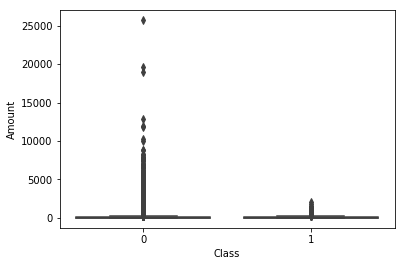

In [10]:
sns.boxplot(df['Class'], df['Amount'])
plt.show()

In [11]:
#create a new feature
df['LowAmount'] = 'N'
df.loc[df['Amount'] < 3000, 'LowAmount'] = 'Y'

## Normalization data

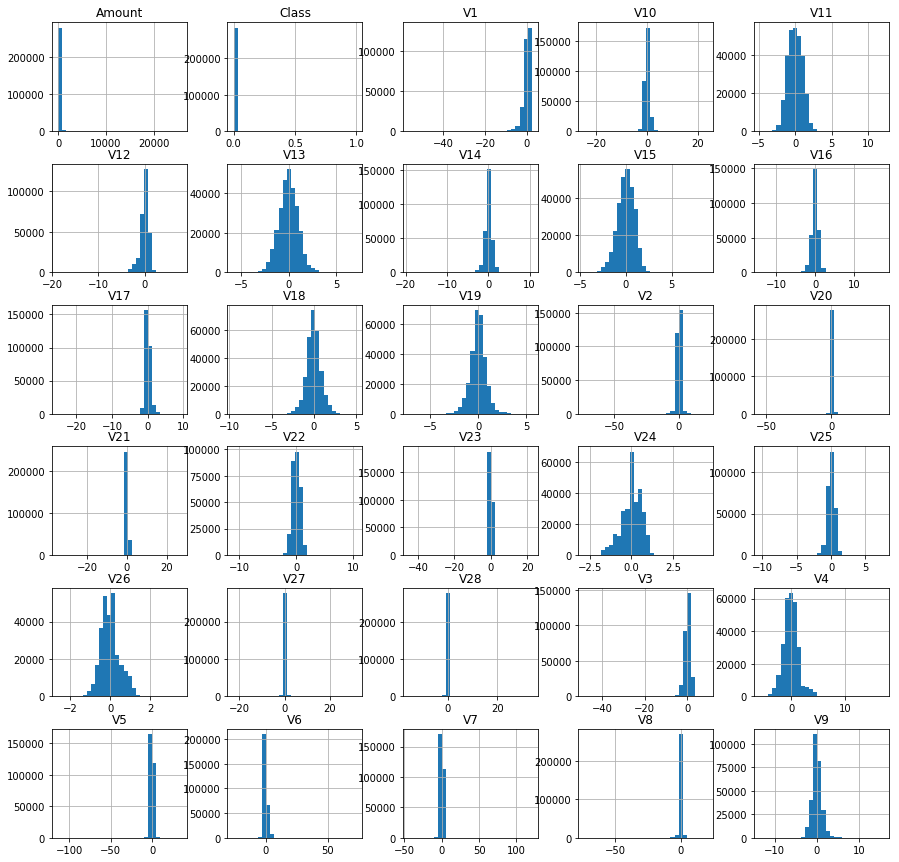

In [12]:
import matplotlib.pyplot as plt
df.hist(bins=30, figsize=(15,15))
plt.show()

In [13]:
#log1p = log(1 + data)
df['Amount'] = np.log1p(df['Amount'])
df['V7'] = np.log1p(df['V7'])
df['V6'] = np.log1p(df['V6'])
df['V21'] = np.log1p(df['V21'])
df['V23'] = np.log1p(df['V23'])

/home/bank/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log1p
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bank/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log1p
  after removing the cwd from sys.path.
/home/bank/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log1p
  """
/home/bank/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log1p
  


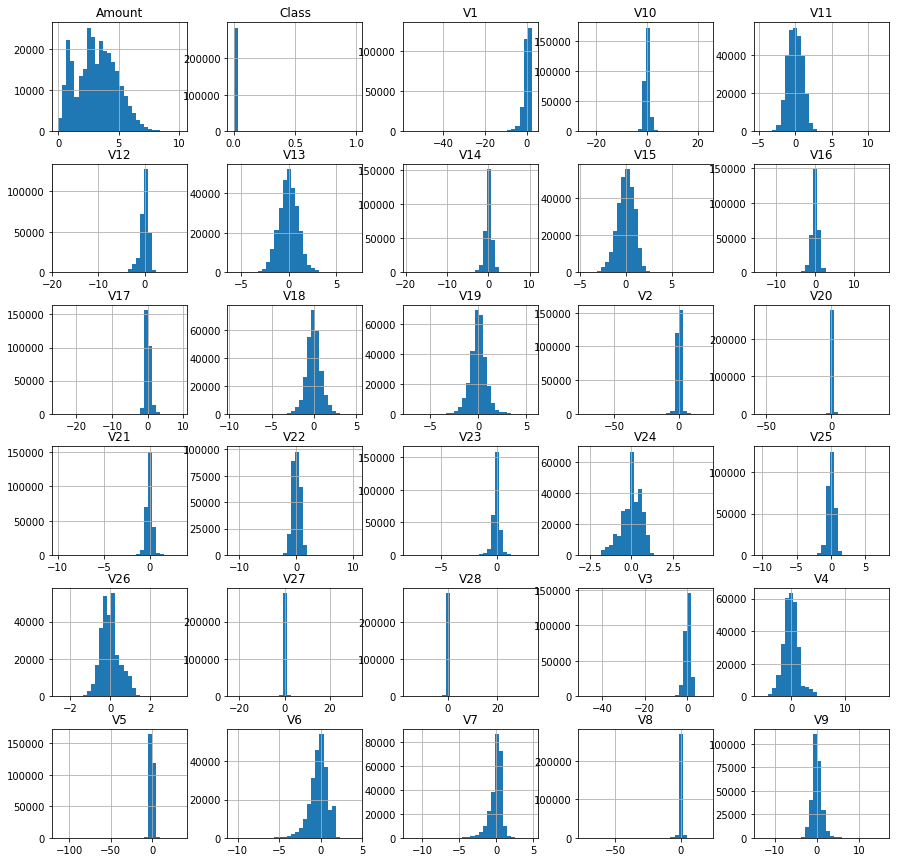

In [14]:
import matplotlib.pyplot as plt
df.hist(bins=30, figsize=(15,15))
plt.show()

## prepare data for modeling

In [15]:
df.fillna(0, inplace=True)
y = df['Class']
X = df.drop(columns=['Class'])
X = pd.get_dummies(X)
#split data to trainset and testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)#

#### Oversampling

In [16]:
OS = SMOTE(random_state=42)

Used SMOTE: (Synthetic Minority Over-sampling Technique)
KNN based for oversampling data

In [17]:
columns = X.columns

In [18]:
SS = StandardScaler()
osX, osY = OS.fit_sample(X_train, y_train)
osX = pd.DataFrame(data=osX, columns=columns)
osY = pd.DataFrame(data=osY, columns=['Class'])
osX['Class'] = osY['Class']

In [19]:
osX.groupby('Class').count()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,LowAmount_N,LowAmount_Y
Class,,,,,,,,,,,,,,,,,,,,,
0,227451,227451,227451,227451,227451,227451,227451,227451,227451,227451,...,227451,227451,227451,227451,227451,227451,227451,227451,227451,227451
1,227451,227451,227451,227451,227451,227451,227451,227451,227451,227451,...,227451,227451,227451,227451,227451,227451,227451,227451,227451,227451


In [20]:
print "Class 0", osX.groupby('Class').count().iloc[0][0] / float(len(osX))
print "Class 1", osX.groupby('Class').count().iloc[1][0] / float(len(osX))

osX.drop(columns=['Class'], inplace=True)

Class 0 0.5
Class 1 0.5


SMOTE generate new sample to balanced class
,so we next create modeling to predict fraud

In [21]:
RFC = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
RFC.fit(SS.fit_transform(osX), osY)
pred = RFC.predict(SS.transform(X_test))

/home/bank/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Use a standard model to test our predict

In [22]:
print "RandomForestClassifier"
print confusion_matrix(y_test, pred)
print (recall_score(y_test, pred))

RandomForestClassifier
[[56853    11]
 [   15    83]]
0.8469387755102041


It is imbalanced classes. So, I choose recall as a metrics. 84.69% it is not bad result.